In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../..")
sys.path.append(os.getcwd()+"/..")
from bit_flip_experiments import *
import pandas as pd
from utils import *
from game import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from notebook_utils import *

In [2]:
Precision.PRECISION = 10
Precision.update_threshold()
# generate_all_lambdas_file()
comments = get_different_algorithms_data(instruction_set="", serialize_dump=False)

In [3]:
algs_union = dict()
for horizon in range(4, 8):
    algs_union[horizon] = dict()
    for alg_index in range(get_num_algorithms(horizon)):
        algs_union[horizon][alg_index] = alg_index

# horizon 5
algs_union[5][4] = 0
algs_union[5][3] = 1
algs_union[5][5] = 2
algs_union[5][8] = 2

# horizon 6
algs_union[6][1] = 0
algs_union[6][4] = 2
algs_union[6][7] = 6

# horizon 7
algs_union[7][6] = 0
algs_union[7][4] = 1
algs_union[7][5] = 1
algs_union[7][7] = 1
algs_union[7][3] = 2
algs_union[7][8] = 2
algs_union[7][13] = 2

# Horizon 4

In [28]:
df4 = get_horizon_df(4, comments)

In [5]:
get_similar_algorithms(4, 0)
print()
get_similar_algorithms(4, 1)

difference of algorithm=0 at horizon=4
diff with alg. 0: max=0.0 min=0.0 std=0.0 avg=0.0
diff with alg. 1: max=0.978 min=0.0020000000000000018 std=0.1924739081371297 avg=0.8255955555555554

difference of algorithm=1 at horizon=4
diff with alg. 0: max=0.978 min=0.0020000000000000018 std=0.1924739081371297 avg=0.8255955555555554
diff with alg. 1: max=0.0 min=0.0 std=0.0 avg=0.0


In [29]:
result = get_df_horizon_describe(df4)
result.to_csv(DIR_PREFIX + "analysis_results/h4_programs.csv")
result

value                                        \
                          count      mean       std     min       25%   
program variable                                                        
0       accum_prob        221.0  0.942742  0.075105  0.5965  0.931000   
        couplers_success  221.0  0.966928  0.094398  0.0000  0.968500   
        success0          221.0  0.955697  0.077628  0.3520  0.954000   
        success1          221.0  0.929787  0.101882  0.2590  0.921000   
        success_diff      221.0  0.025910  0.101237 -0.5180  0.002000   
1       accum_prob          4.0  0.817625  0.166986  0.6100  0.718750   
        couplers_success    4.0  0.476125  0.014168  0.4565  0.471875   
        success0            4.0  0.852500  0.108285  0.7190  0.787250   
        success1            4.0  0.782750  0.262196  0.4100  0.695750   
        success_diff        4.0  0.069750  0.222280 -0.0720 -0.055500   

                                                    
                              50%       75%    max  
program variable                                    
0       accum_prob        0.97050  0.985000  0.997  
        couplers_success  0.98150  0.989000  0.994  
        success0          0.98500  0.992000  0.998  
        success1          0.96100  0.981000  0.996  
        success_diff      0.01400  0.032000  0.675  
1       accum_prob        0.85025  0.949125  0.960  
        couplers_success  0.47900  0.483250  0.490  
        success0          0.87250  0.937750  0.946  
        success1          0.86800  0.955000  0.985  
        success_diff     -0.02450  0.100750  0.400

# Horizon 5

In [30]:
df5 = get_horizon_df(5, comments)

In [8]:
# for i in range(get_num_algorithms(5)):
#     get_similar_algorithms(5, i)
#     print("-----------")
#     print()

Algorithms groups
- 0 = 4 // searches for first 1
- 1 = 3 /// Trust on 0
- 2 = 5 = 8 // only 1 measurement is enough
- 6
- 7

Note: Algorithm 0 is the traditional algorithm

In [31]:
df5.loc[df5["program"] == 4, "program"] = 0
df5.loc[df5["program"] == 3, "program"] = 1
df5.loc[df5["program"] == 5, "program"] = 2
df5.loc[df5["program"] == 8, "program"] = 2


In [32]:
result = get_df_horizon_describe(df5)
result.to_csv(DIR_PREFIX + "analysis_results/h5_programs.csv")

In [5]:
# print_df_horizon_describe(df5)

- success_diff for algorithm 2 is 0.0
- couplers_success is low in algorithms 6 and 7
- success_diff has different signs for algorithms 6 and 7
- success_diff has different signs for algorithms 0 and 1

# Horizon 6

In [33]:
df6 = get_horizon_df(6, comments)

In [27]:
# for i in range(get_num_algorithms(6)):
#     get_similar_algorithms(6, i)
#     print("-----------")
#     print()

- 0 = 1
- 2 = 4 // flip on first encounter with 1
- 3 // ends on first encounter with 0
- 5
- 6 = 7

Note: Algorithm 0 is the traditional algorithm

In [34]:
df6.loc[df6["program"] == 1, "program"] = 0

df6.loc[df6["program"] == 4, "program"] = 2
df6.loc[df6["program"] == 7, "program"] = 6


In [35]:
result = get_df_horizon_describe(df6)
result.to_csv(DIR_PREFIX + "analysis_results/h6_programs.csv")

In [6]:
# print_df_horizon_describe(df6)

# Horizon 7

In [36]:
df7 = get_horizon_df(7, comments)

In [10]:
# for i in range(get_num_algorithms(7)):
#     get_similar_algorithms(7, i)
#     print("-----------")
#     print()

In [37]:
df7.loc[df7["program"] == 6, "program"] = 0

df7.loc[df7["program"] == 4, "program"] = 1
df7.loc[df7["program"] == 5, "program"] = 1
df7.loc[df7["program"] == 7, "program"] = 1

df7.loc[df7["program"] == 3, "program"] = 2
df7.loc[df7["program"] == 8, "program"] = 2
df7.loc[df7["program"] == 13, "program"] = 2


In [38]:
result = get_df_horizon_describe(df7)
result.to_csv(DIR_PREFIX + "analysis_results/h7_programs.csv")

# Visualizing Lambdas

In [15]:
df = pd.read_csv(DIR_PREFIX + "analysis_results/all_lambdas.csv")

In [16]:
df['hardware'] = df.apply(lambda row : row.hardware_spec + str(row.embedding) , axis=1)

In [17]:
df

,Unnamed: 0,hardware_spec,embedding,horizon,lambda,time,hardware
0,0,fake_athens,0,4,0.975781,33,fake_athens0
1,1,fake_athens,0,5,0.981776,164,fake_athens0
2,2,fake_athens,0,6,0.986671,802,fake_athens0
3,3,fake_athens,0,7,0.987085,3896,fake_athens0
4,4,fake_athens,1,4,0.954194,33,fake_athens1
...,...,...,...,...,...,...,...
895,895,fake_washington,5,7,0.809437,4371,fake_washington5
896,896,fake_washington,6,4,0.980529,37,fake_washington6
897,897,fake_washington,6,5,0.981298,182,fake_washington6
898,898,fake_washington,6,6,0.983211,899,fake_washington6


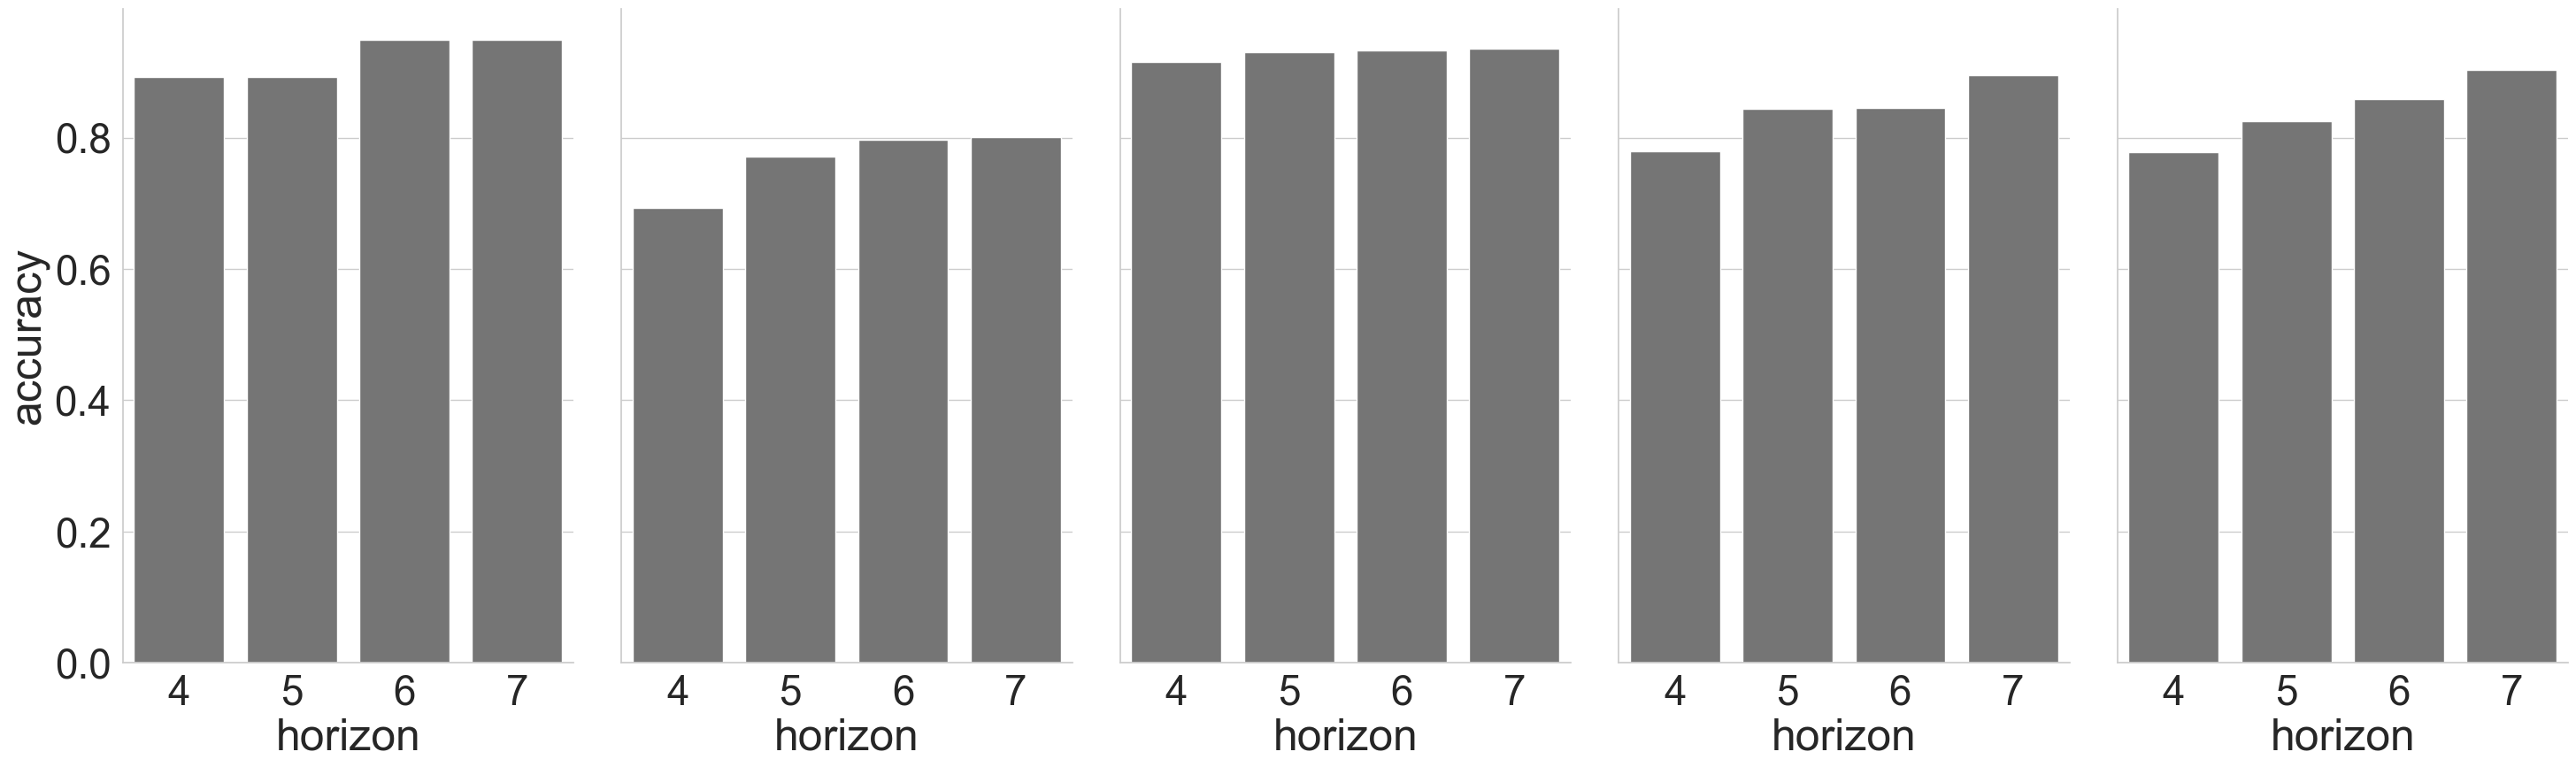

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_theme(style="whitegrid", font_scale=3)
palette="black"
ax = sns.catplot(kind="bar", height=10, aspect=.6, data=df.loc[df.hardware.isin(["fake_paris0", "fake_tenerife0", "fake_yorktown5", "fake_quito0", "fake_melbourne3"])], col="hardware", y="lambda", x="horizon", palette=["#757575", "#757575", "#757575", "#757575"])

# ax.bar_label(ax.containers[0], fontsize=10)
# ax.bar_label(ax.containers[1], fontsize=10)
# ax.bar_label(ax.containers[2], fontsize=10)
# ax.bar_label(ax.containers[3], fontsize=10)
# plt.legend(loc='lower right')

ax.set_titles("")
ax.set_axis_labels("horizon", "accuracy")
plt.savefig(DIR_PREFIX+"analysis_results/growth_per_horizon.pdf", format='pdf')


- fake_tenerife0: it is not worthy using the algorithm found at horizon=7, the advantage is in horizon=6. There is an increase only at even horizon
- fake_yorktown5: the biggest advantage is at horizon=5
- fake_quito0: might not be worthy to use algorithms found at horizon=6 and horizon=7
- fake_melbourne3: there is an increase only at odd horizons
- fake_paris0: might be worthy to explore further horizons

# Which kind of programs have the most advantage with respect to the traditional algorithm?

In [6]:
accs_diffs, diff_backends_stats = get_stats(4, comments, algs_union)
for (alg_index, values) in accs_diffs.items():
    print(f"{alg_index} -> max={max(values)}, {np.average(values)}")

0 -> max=0.0, 0.0
1 -> max=0.05500000000000005, 0.038000000000000034


In [14]:
accs_diffs, diff_backends_stats = get_stats(4, comments, algs_union, get_trad_best=True)
for (alg_index, values) in accs_diffs.items():
    print(f"{alg_index} ({len(values)}) -> max={max(values)}, {np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 (221) -> max=0.0, 0.0
1 (4) -> max=0.05500000000000005, 0.038000000000000034
algorithms:  [1]
fake_manhattan1


In [8]:
diff_backends_stats[1]

['fake_cambridge0', 'fake_manhattan0', 'fake_manhattan1', 'fake_washington4']

In [9]:
accs_diffs[1]

[0.014000000000000012,
 0.052000000000000046,
 0.05500000000000005,
 0.031000000000000028]

In [10]:
accs_diffs, diff_backends_stats = get_stats(5, comments, algs_union)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} -> max={max(values)}, avg={np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 -> max=0.0050000000000000044, avg=7.647058823529419e-05
1 -> max=0.14900000000000002, avg=0.028000000000000004
2 -> max=0.0030000000000000027, avg=0.00037500000000000033
6 -> max=0.04300000000000004, avg=0.024500000000000022
7 -> max=0.06300000000000006, avg=0.04200000000000004
algorithms:  [1]
fake_johannesburg0


In [15]:
accs_diffs, diff_backends_stats = get_stats(5, comments, algs_union, get_trad_best=True)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} ({len(values)})-> max={max(values)}, {np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 (170)-> max=0.0050000000000000044, 7.647058823529419e-05
1 (43)-> max=0.07999999999999996, 0.014232558139534881
2 (8)-> max=0.0030000000000000027, -0.0006250000000000006
6 (2)-> max=0.04300000000000004, 0.024500000000000022
7 (2)-> max=0.06300000000000006, 0.04200000000000004
algorithms:  [1]
fake_johannesburg0


In [4]:
accs_diffs, diff_backends_stats = get_stats(6, comments, algs_union)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} -> max={max(values)}, avg={np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 -> max=0.008000000000000007, avg=0.0
2 -> max=0.07200000000000006, avg=0.0243
3 -> max=0.07000000000000006, avg=0.026499999999999996
5 -> max=0.018000000000000016, avg=0.018000000000000016
6 -> max=0.07800000000000001, avg=0.06500000000000004
algorithms:  [6]
fake_manhattan1


In [16]:
accs_diffs, diff_backends_stats = get_stats(6, comments, algs_union, get_trad_best=True)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} ({len(values)}) -> max={max(values)}, avg={np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 (207) -> max=0.008000000000000007, avg=0.0
2 (10) -> max=0.02400000000000002, avg=0.006000000000000005
3 (4) -> max=0.07000000000000006, avg=0.03
5 (1) -> max=0.016000000000000014, avg=0.016000000000000014
6 (3) -> max=0.06700000000000006, avg=0.051666666666666715
algorithms:  [3]
fake_cambridge2


In [12]:
accs_diffs, diff_backends_stats = get_stats(7, comments, algs_union)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} -> max={max(values)}, avg={np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 -> max=0.0040000000000000036, avg=1.1976047904191627e-05
1 -> max=0.12, avg=0.01826190476190476
2 -> max=0.0040000000000000036, avg=0.0001250000000000001
9 -> max=0.055999999999999994, avg=0.04450000000000001
10 -> max=0.127, avg=0.127
11 -> max=0.01200000000000001, avg=0.0050000000000000044
12 -> max=0.05900000000000005, avg=0.04750000000000004
algorithms:  [10]
fake_cambridge2


In [18]:
accs_diffs, diff_backends_stats = get_stats(7, comments, algs_union, get_trad_best=True)
for (alg_index, values) in accs_diffs.items():
    if len(values) > 0:
        print(f"{alg_index} ({len(values)}) -> max={max(values)}, avg={np.average(values)}")
get_best_backends(accs_diffs, diff_backends_stats)

0 (167) -> max=0.0030000000000000027, avg=-2.3952095808383254e-05
1 (42) -> max=0.06300000000000006, avg=0.009500000000000003
2 (8) -> max=0.0020000000000000018, avg=-0.0015000000000000013
9 (2) -> max=0.039000000000000035, avg=0.031000000000000028
10 (1) -> max=0.06800000000000006, avg=0.06800000000000006
11 (3) -> max=0.006000000000000005, avg=0.00033333333333333365
12 (2) -> max=0.05900000000000005, avg=0.04250000000000004
algorithms:  [10]
fake_cambridge2


# Plots for Main Paper

In [4]:
from matplotlib.colors import to_rgba
TRAD_COLOR = "#1E4CF3"
TRAD_COLOR_W_ALPHA = to_rgba("#1E4CF3", 0.1)
IPMA1_COLOR = "#970E53"
IPMA2_COLOR = "#017100"
ORANGE = sns.color_palette()[1]
RED = "#ED220D"
BROWN = sns.color_palette()[5]
BLUEGREEN = "#00A89D"

In [5]:
TAKE_BEST = True
df_traditional = get_traditional_df(take_best=TAKE_BEST)
df_best4 = get_df_plots({4:1, 5:7, 6: 7}, take_best=TAKE_BEST) # get_chosen_algorithm_df(4,1, take_best=TAKE_BEST)
df_best6 = get_df_plots({4:0, 5:3, 6: 3}, take_best=TAKE_BEST)

In [6]:
df_traditional['algorithm']  = 'Traditional'
df_best4['algorithm'] = 'Algorithm 1'
df_best6['algorithm'] = 'Algorithm 2'
all_dfs = pd.concat([df_traditional, df_best4, df_best6])

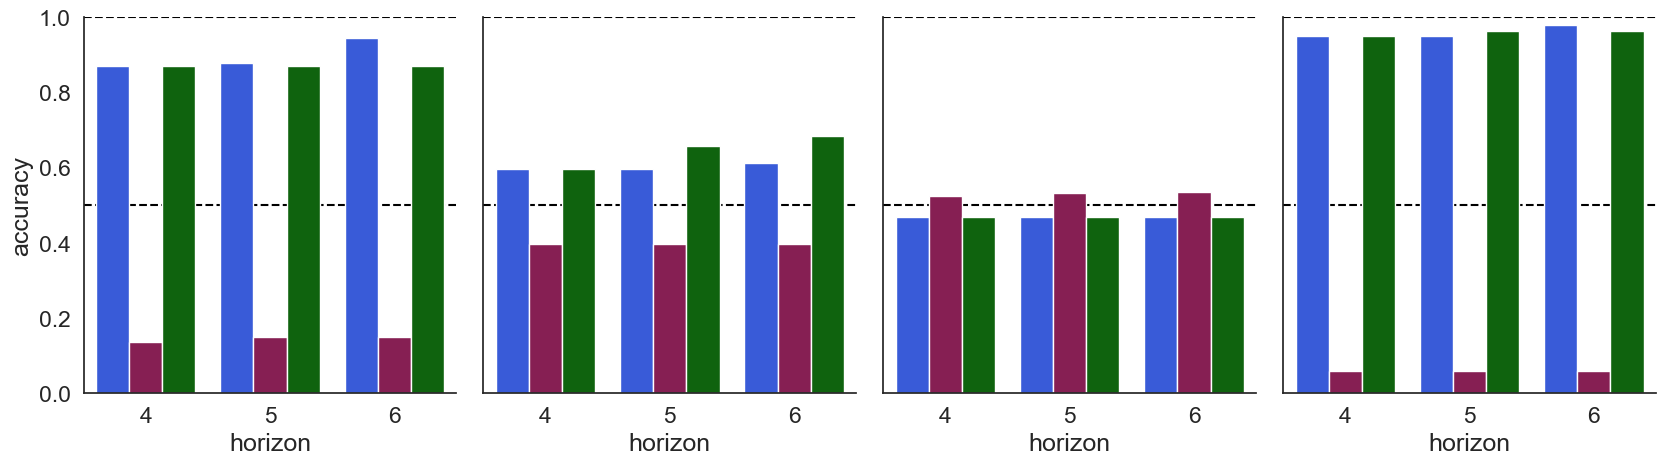

In [7]:
sns.set_theme(style="white", font_scale=1.5)
g = sns.catplot(
    all_dfs, kind="bar",
    col="hardware_spec", y="accuracy", x="horizon",
    height=5, aspect=.85, hue="algorithm",legend=False,palette=[TRAD_COLOR, IPMA1_COLOR, IPMA2_COLOR])
plt.ylim(0, 1.0)
# g.set(xticklabels=[])
# g.set(xlabel=None)
# g.set_titles(template='{col_name}')
g.set_titles("")
# sns.move_legend(g, "center")
# g._legend.set_title("")

# g.despine(left=True)
# plt.legend(loc='upper right')

# iterate through axes
# for ax in g.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:
#         labels = [f'{v.get_height()}' for v in c]
#         ax.bar_label(c, labels=labels, label_type='edge')
#     ax.margins(y=0.2)
g.refline(y=0.5, color='black', zorder=0)
g.refline(y=1.0, color='black', zorder=0)
#     ax.hlines([0.4], xmin="Traditional", xmax="Algorithm 2",  zorder=0)
#     ax.hlines([0.8],xmin="Sydney2", xmax="Cambridge2", zorder=0)
plt.savefig(DIR_PREFIX+"/analysis_results/all_hardwares.png", format='png')

# Visualizing all Lambdas

In [28]:
df, horizon_lines = get_df_visualizing_lambdas(comments, algs_union, only_own_alg=True, take_best=TAKE_BEST)
sns.set(rc={'figure.figsize':(20,30)},style="whitegrid",font_scale=2.5)

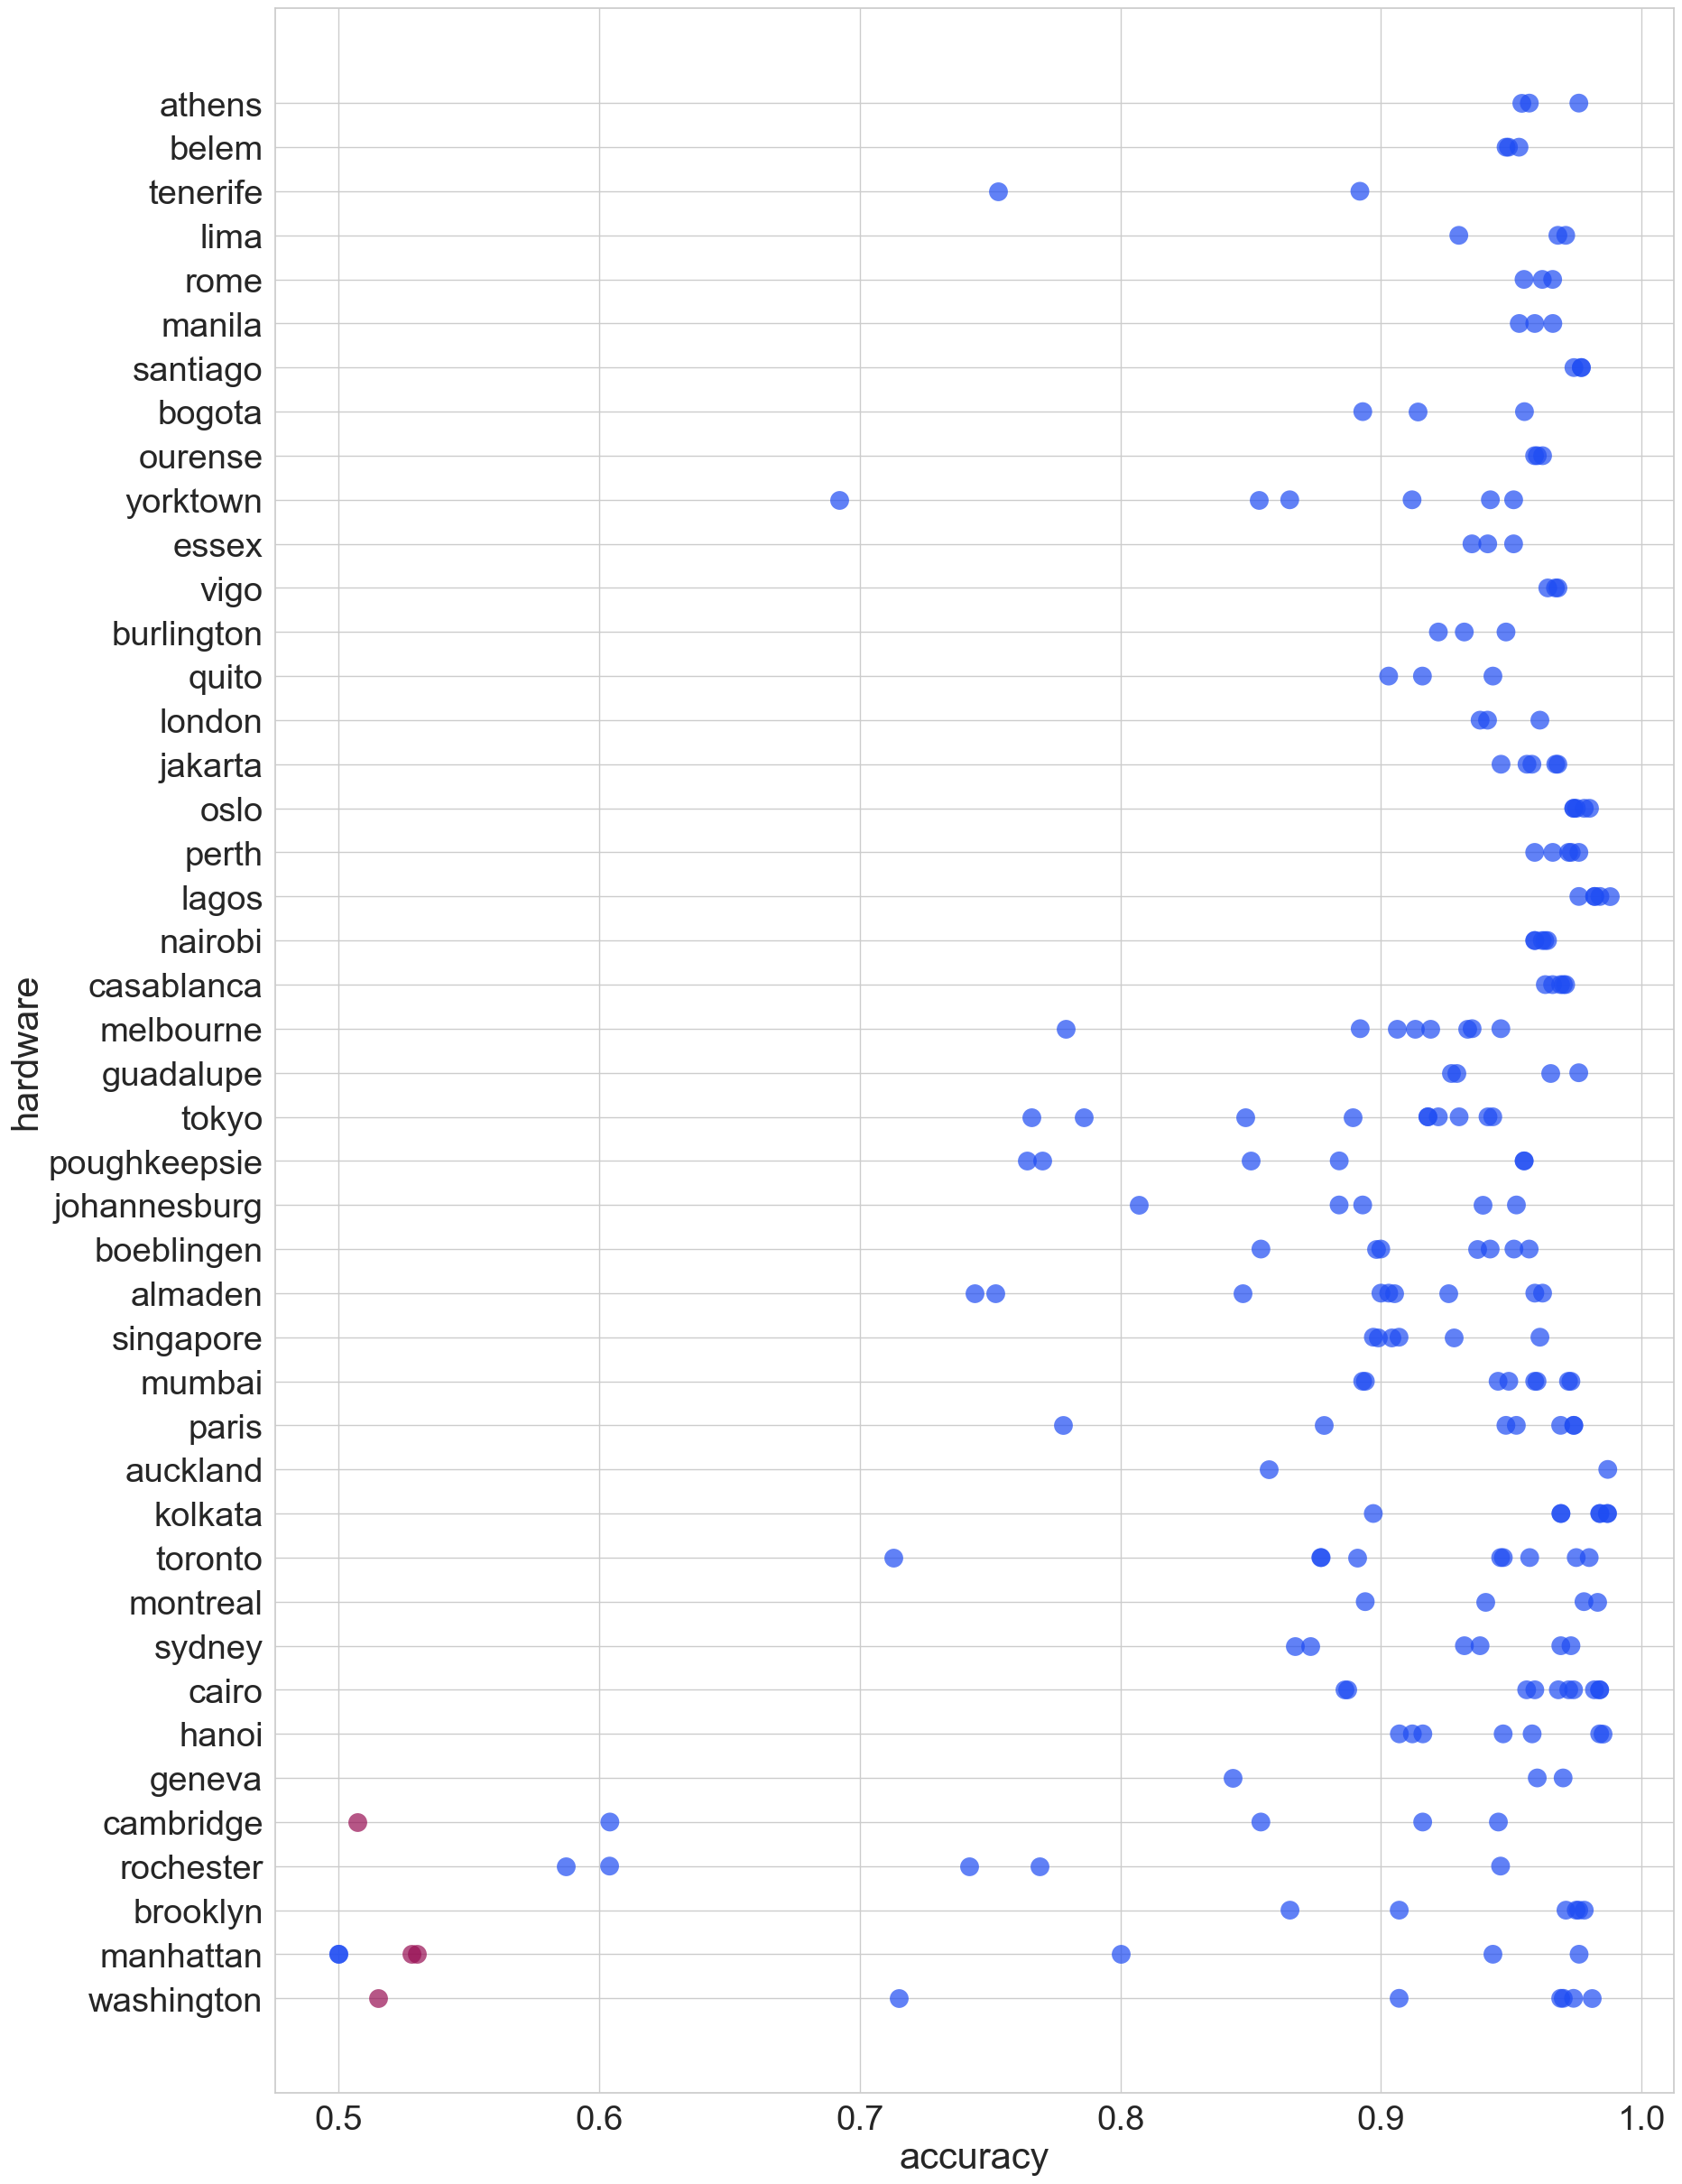

In [30]:
new_palette = [TRAD_COLOR, IPMA1_COLOR]
sns.stripplot(data=df[df.horizon == 4], x="accuracy", y="hardware", hue="alg_class", palette=new_palette,native_scale=True, orient="v", legend=False, s=15, alpha=0.7)
plt.savefig(DIR_PREFIX+"/images/h4_per_hardware_algs.pdf", format='pdf')

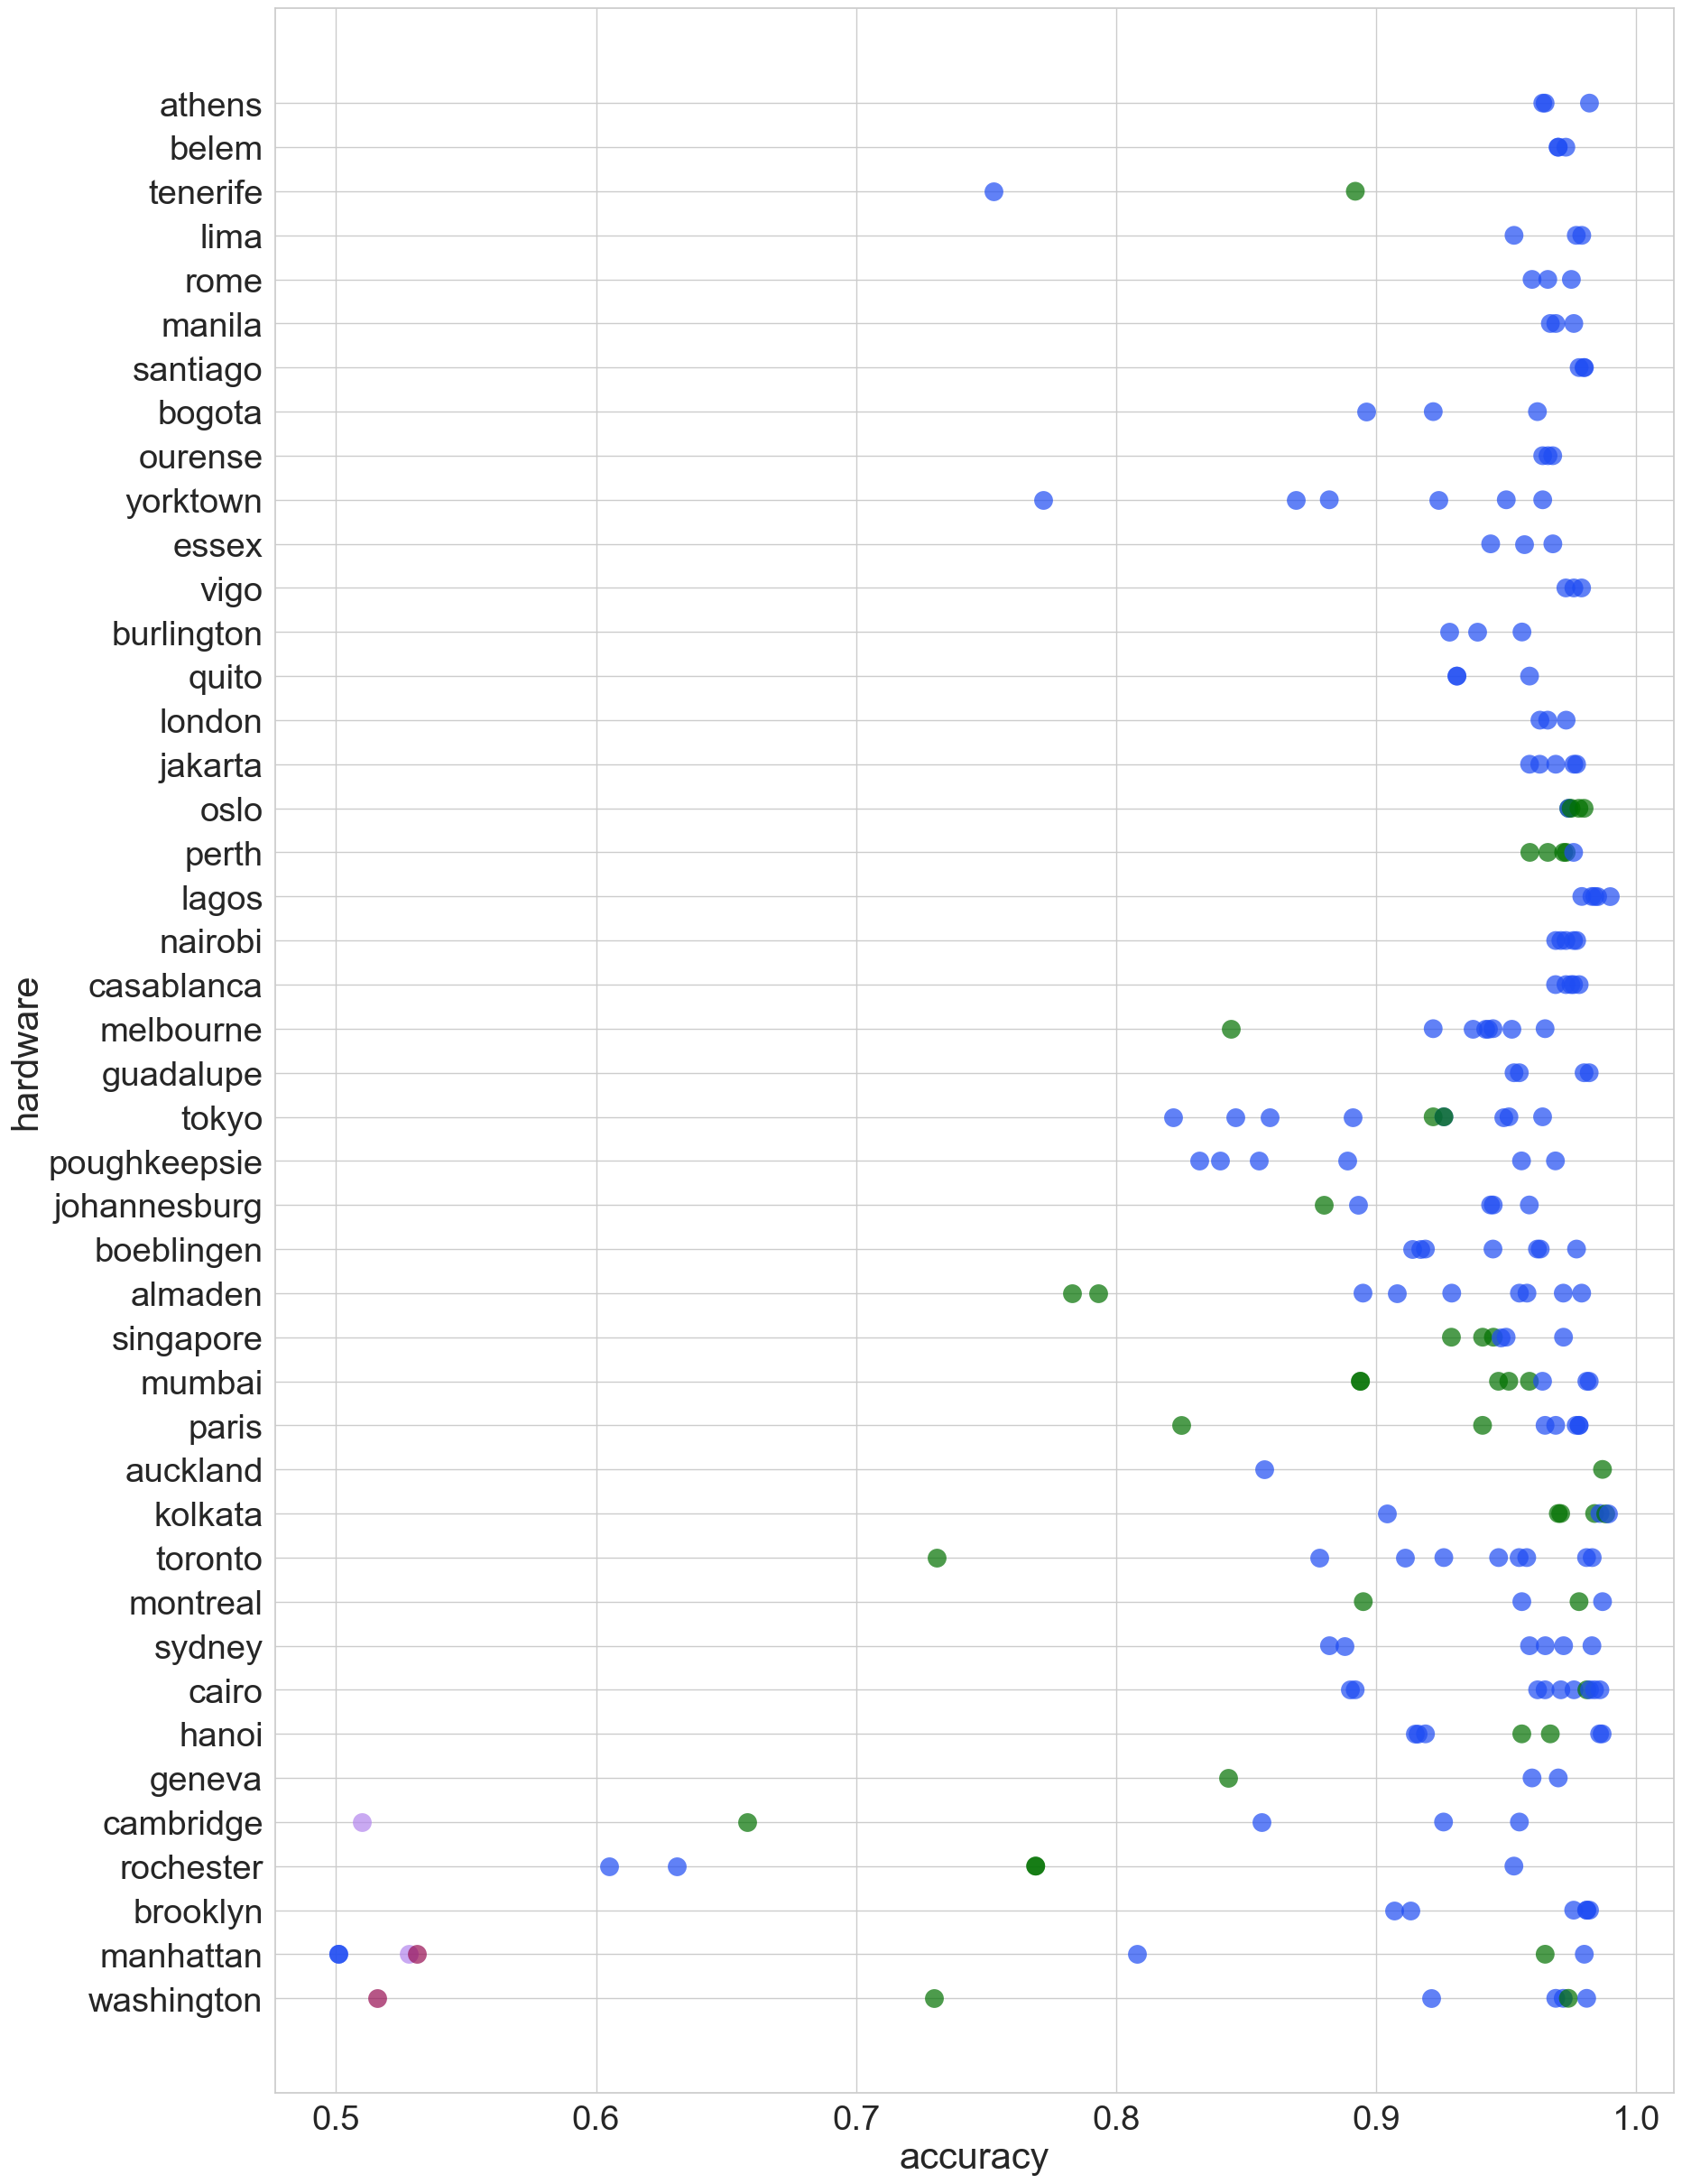

In [31]:
IPMA3_COLOR = "#B385ED"
new_palette = [TRAD_COLOR, IPMA2_COLOR, TRAD_COLOR, IPMA3_COLOR, IPMA1_COLOR]
# {4:0, 5:3, 6: 3}
hue_order = [0, 1, 2,6, 7]
assert len(new_palette) == len(hue_order)
sns.stripplot(data=df[df.horizon == 5], x="accuracy", y="hardware", hue="alg_class", palette=new_palette,native_scale=True, orient="v", legend=False, s=15, alpha=0.7,  hue_order=hue_order)
plt.savefig(DIR_PREFIX+"/images/h5_per_hardware_algs.pdf", format='pdf')

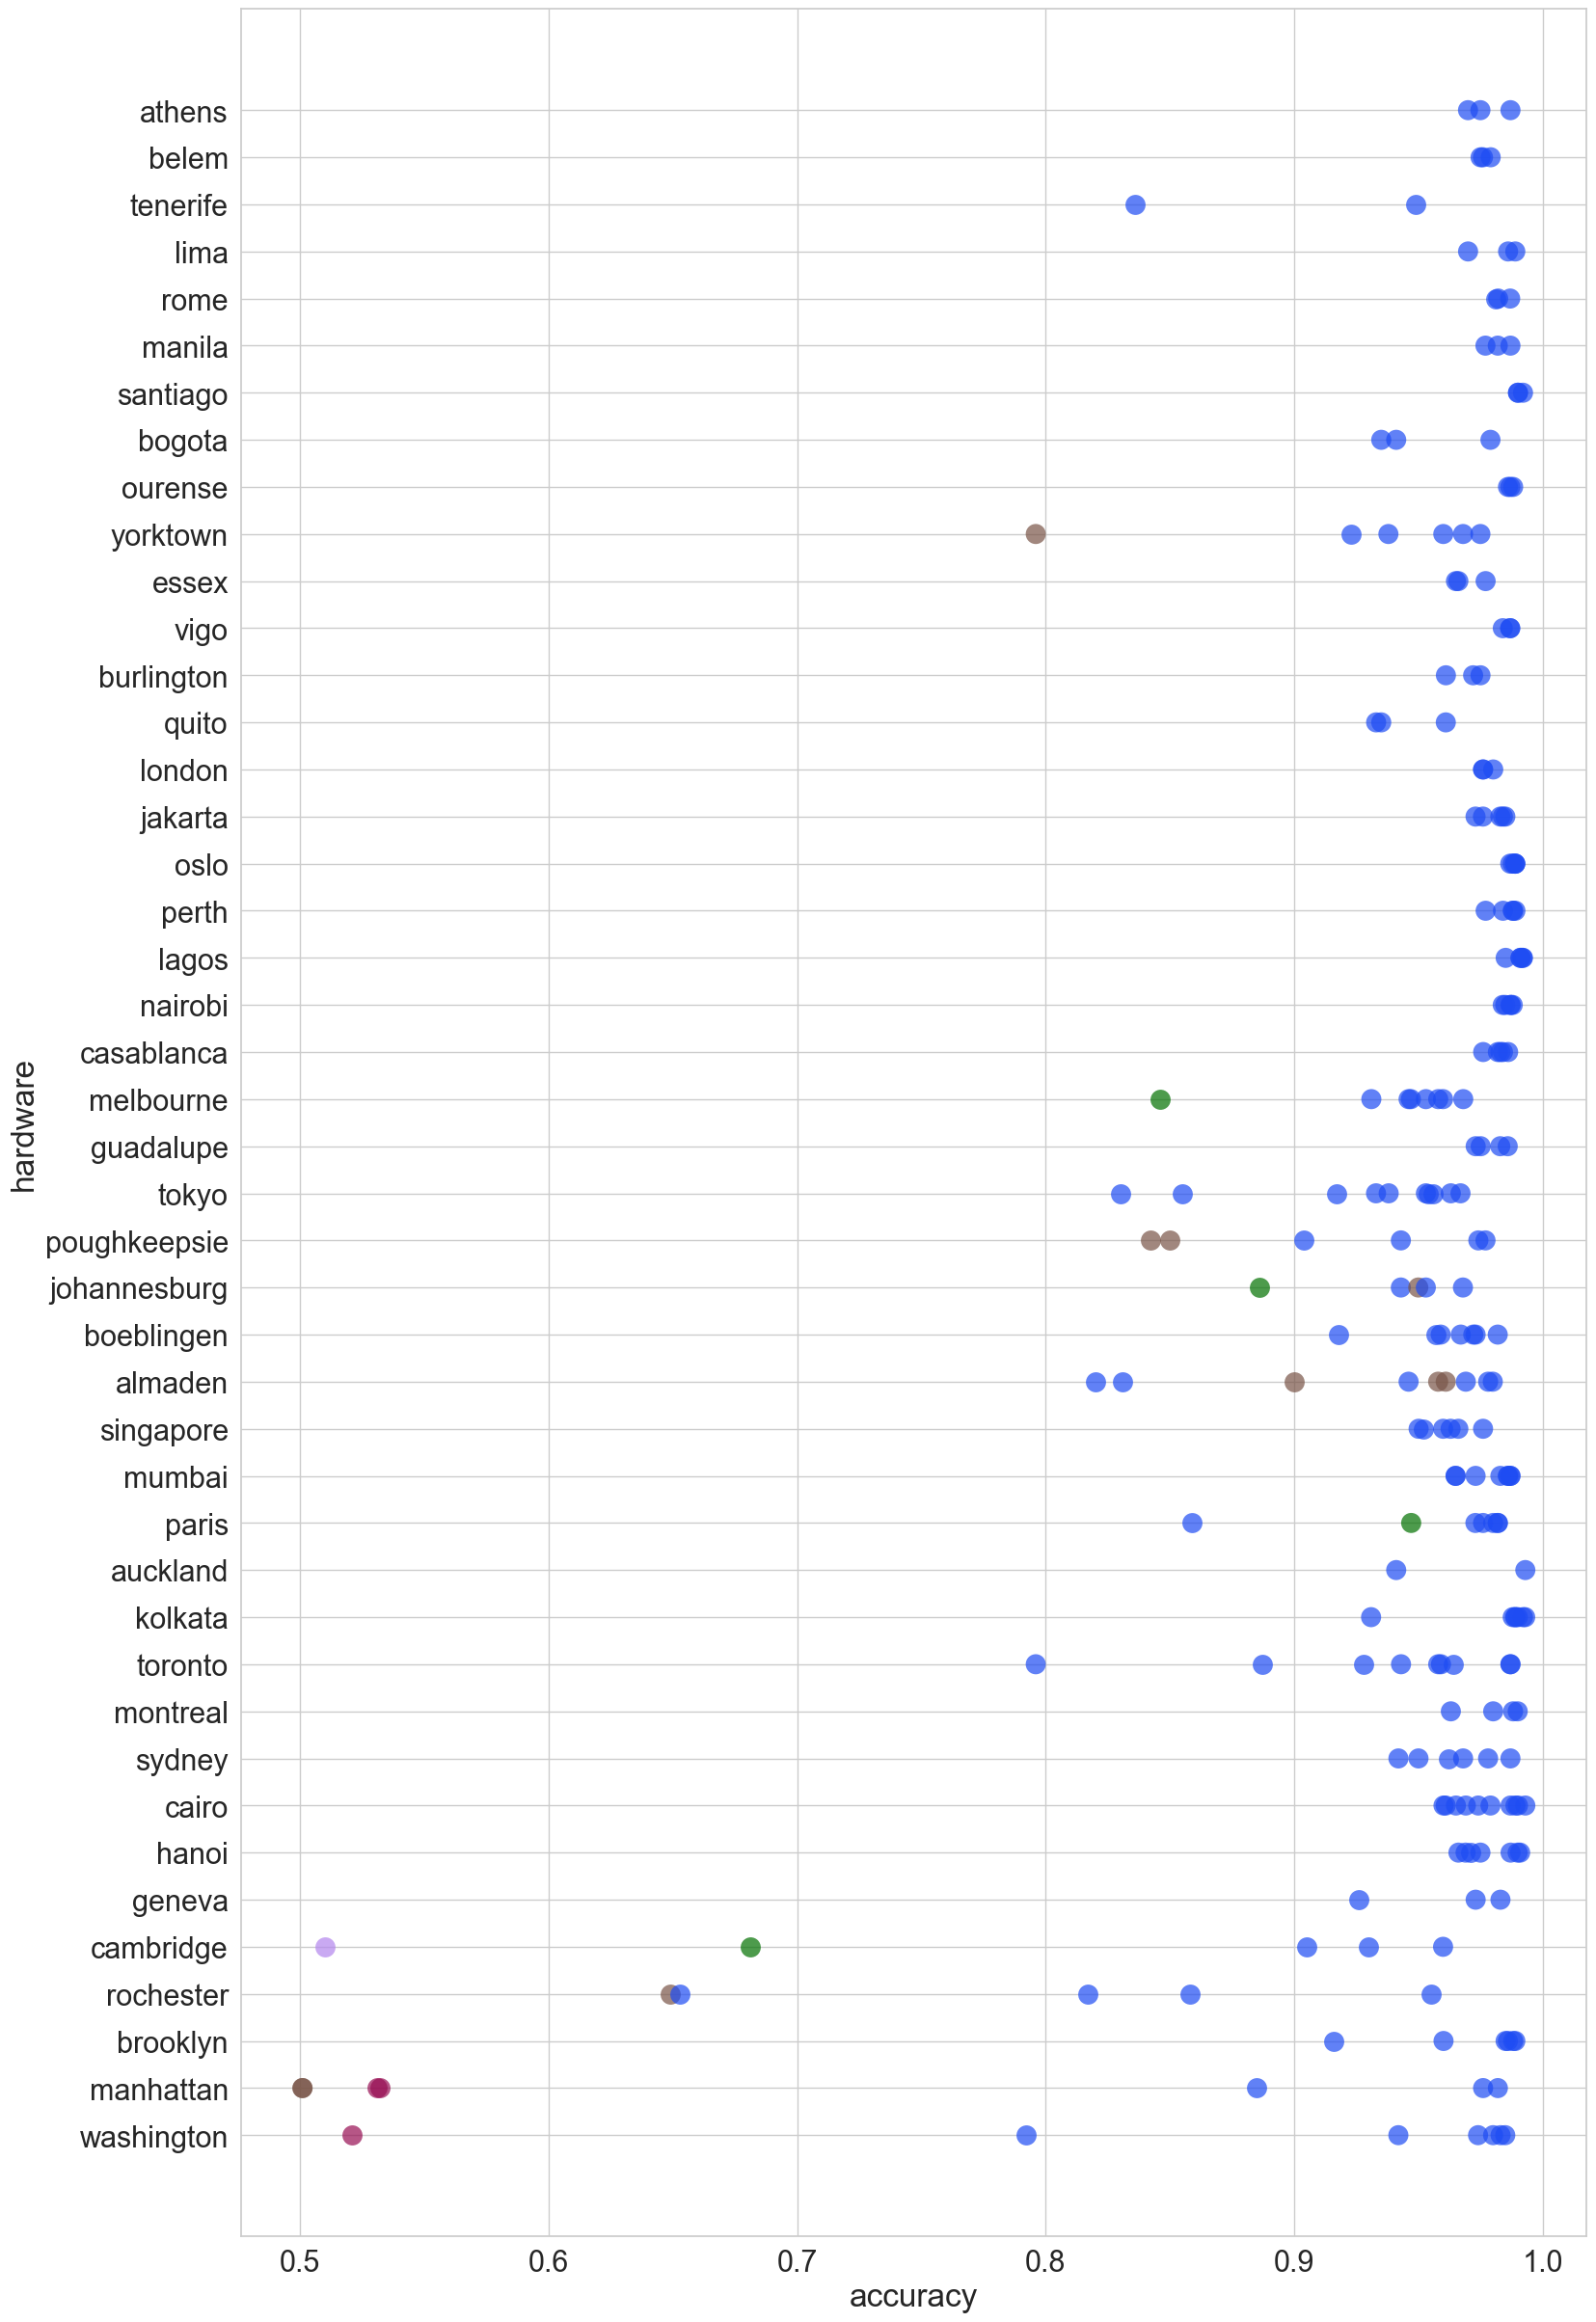

In [ ]:
sns.set(rc={'figure.figsize':(18,30)},style="whitegrid",font_scale=2) # for main paper
IPMA4_COLOR = "#795548"
IPMA5_COLOR = "#B385ED"
new_palette = [TRAD_COLOR, IPMA2_COLOR,  IPMA4_COLOR, IPMA5_COLOR, IPMA1_COLOR]
hue_order = [0,3,2,5,6]
sns.stripplot(data=df[df.horizon == 6], x="accuracy", y="hardware", hue="alg_class", palette=new_palette,native_scale=True, orient="v", legend=False,  hue_order=hue_order, s=15, alpha=0.7)
plt.savefig(DIR_PREFIX+"/images/h6_per_hardware_algs.pdf", format='pdf')

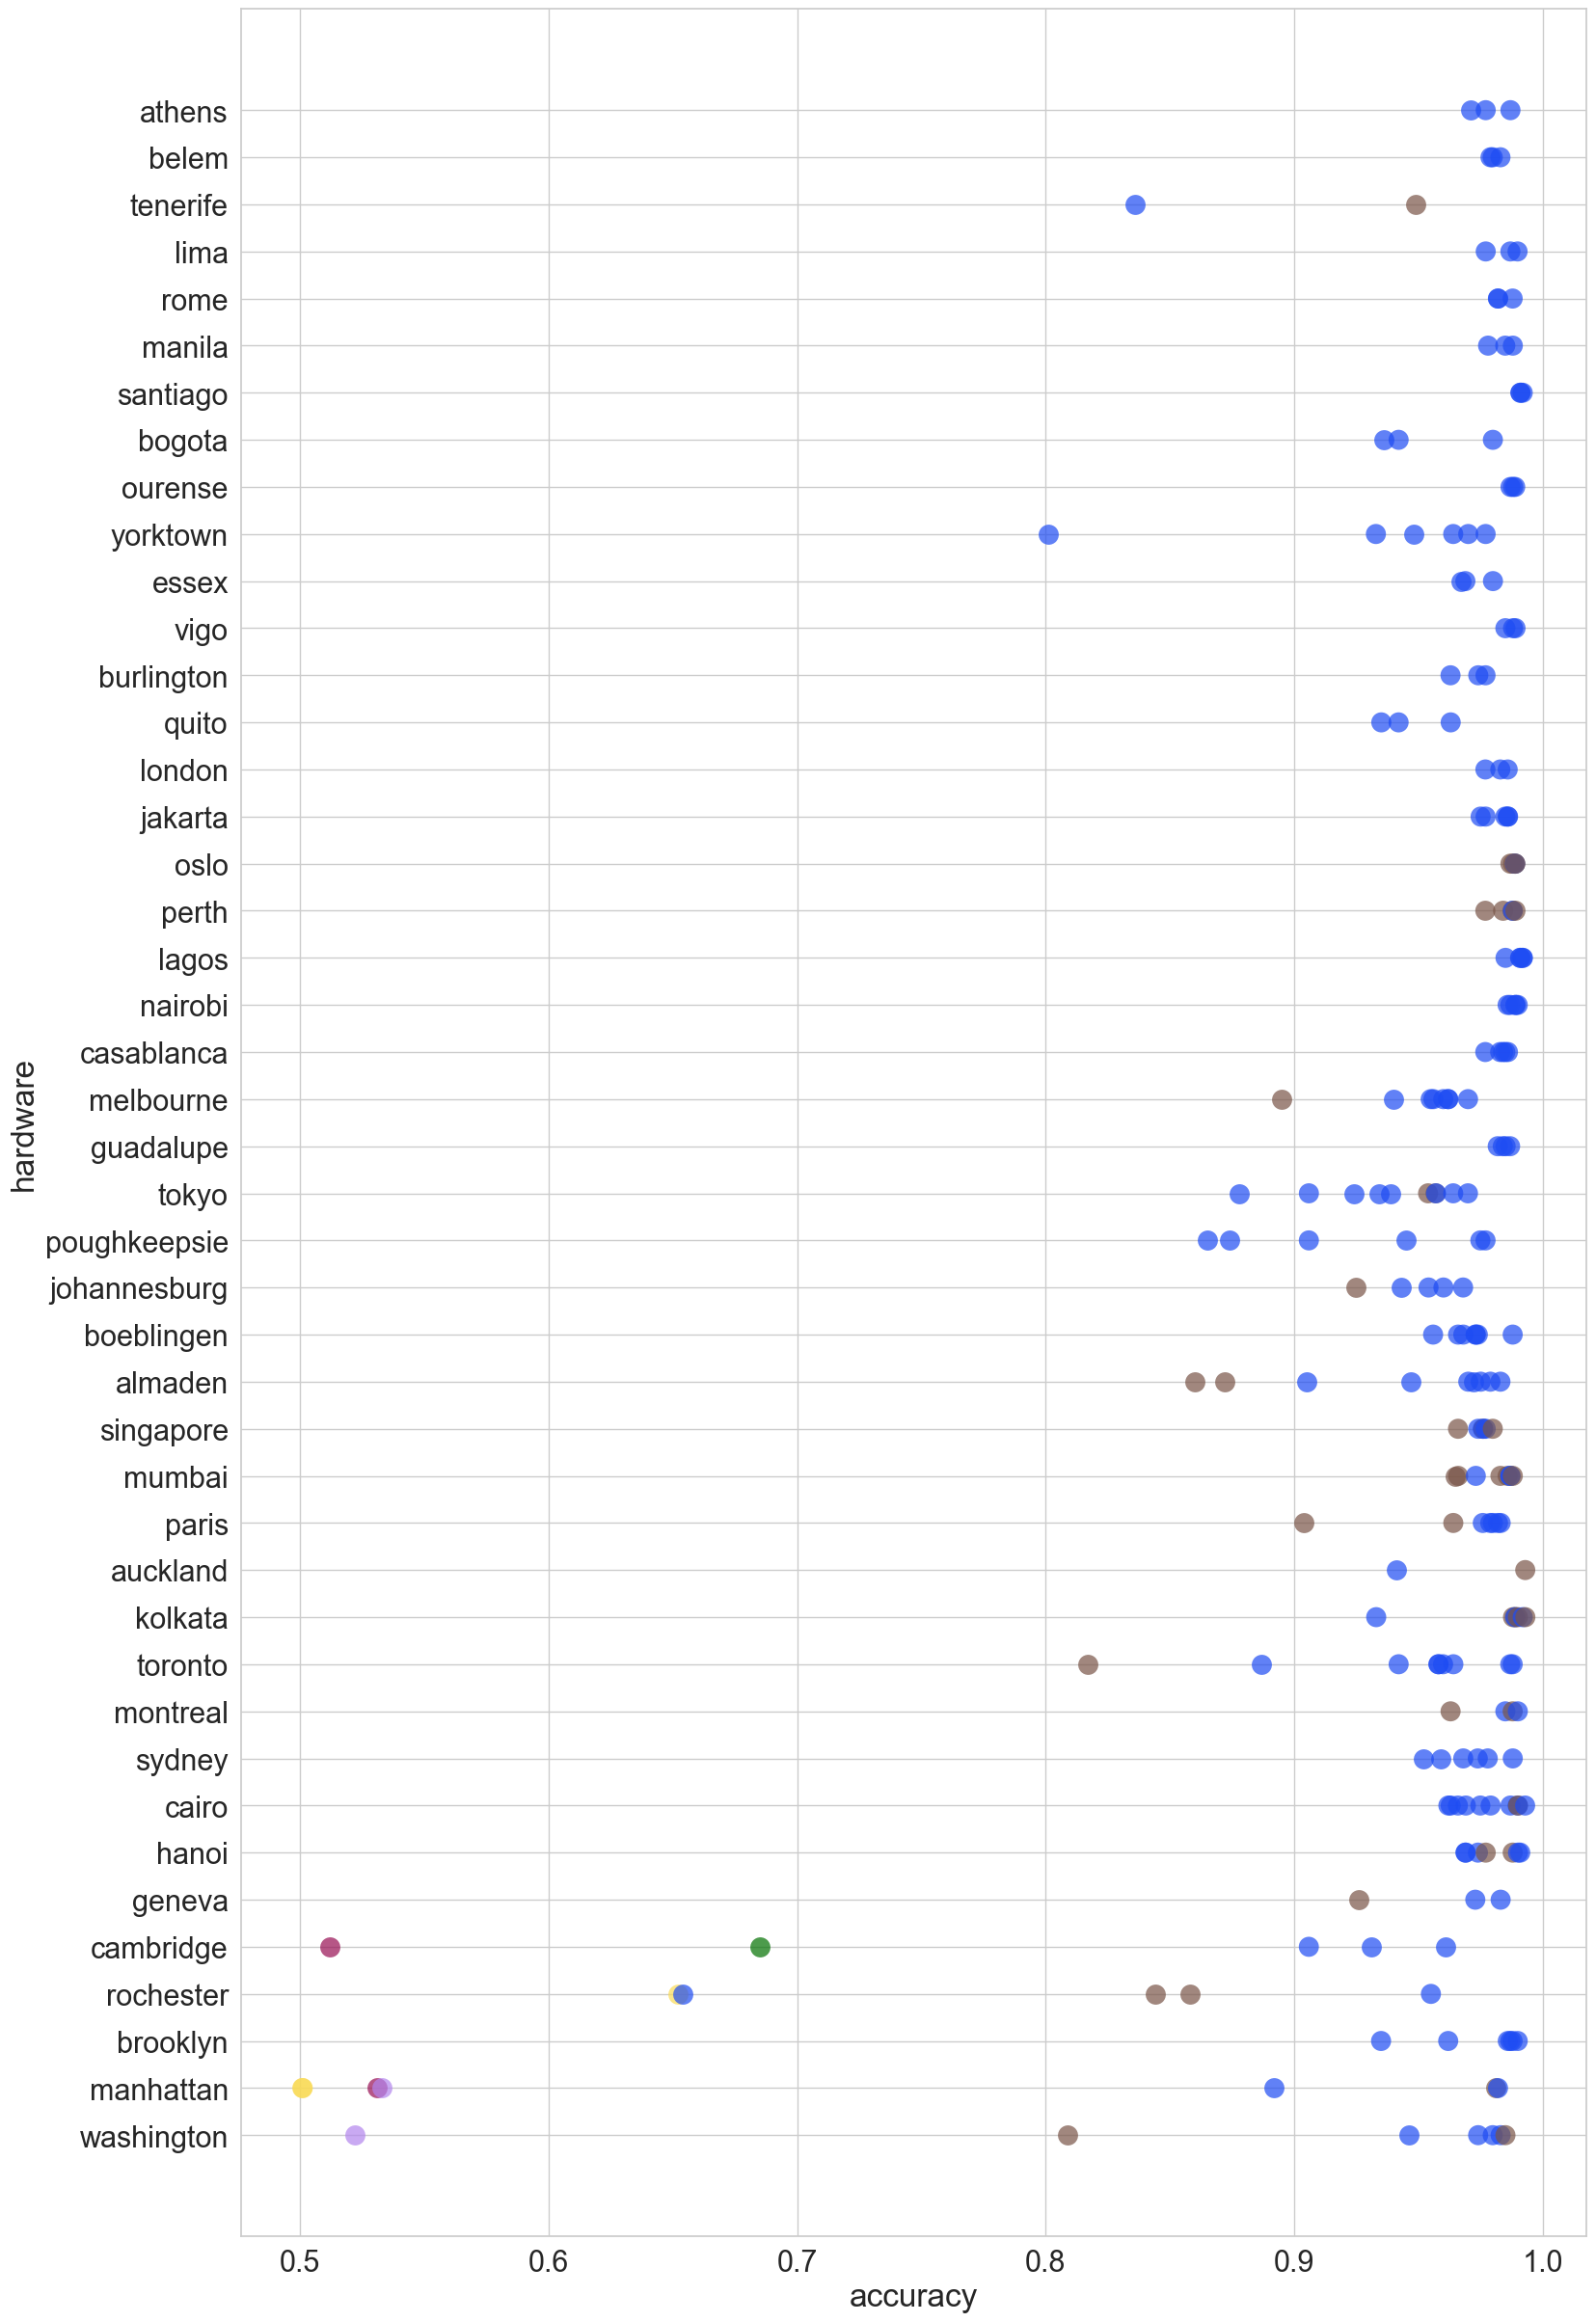

In [34]:
IPMA6_COLOR = "#795548"
IPMA7_COLOR = "#F9DA56"
IPMA8_COLOR = "#B385ED"
new_palette = [TRAD_COLOR, IPMA2_COLOR,  IPMA6_COLOR, IPMA1_COLOR, IPMA7_COLOR, IPMA8_COLOR,TRAD_COLOR]
hue_order = [0,10,1,9,11,12,2]
assert len(new_palette) == len(hue_order)
sns.stripplot(data=df[df.horizon == 7], x="accuracy", y="hardware", hue="alg_class", palette=new_palette,native_scale=True, orient="v", legend=False,  hue_order=hue_order, s=15, alpha=0.7)
plt.savefig(DIR_PREFIX+"/images/h7_per_hardware_algs.pdf", format='pdf')

# Visualizing Accuracies

In [12]:
is_main = True # toggle 
df, horizon_lines = get_df_visualizing_lambdas(comments, algs_union, filter_out_non_advantage=is_main, take_best=TAKE_BEST)
if is_main:
    sns.set(rc={'figure.figsize':(4,5)},style="white",font_scale=2) # for main paper
else:
    sns.set(rc={'figure.figsize':(15,10)},style="white",font_scale=1.5)
only_trad_df, _ = get_df_visualizing_lambdas(comments, algs_union, filter_out_non_advantage=False, take_best=TAKE_BEST, get_only_trad=True)


In [13]:
import random
import copy
if is_main:
    df2 = pd.concat([only_trad_df, df])    
else:
    df2 = df
hardware_order = copy.deepcopy(df2['hardware_spec'].values)
random.Random(5).shuffle(hardware_order)

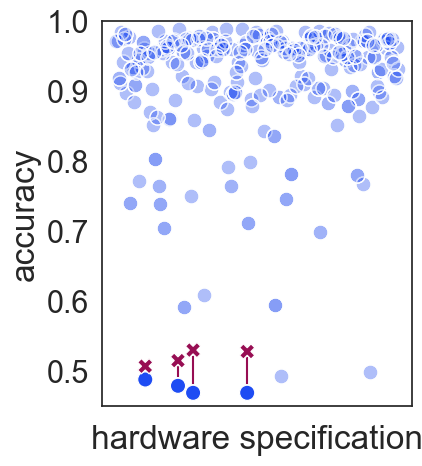

In [15]:
new_palette = [TRAD_COLOR, IPMA1_COLOR, TRAD_COLOR_W_ALPHA]
hue_order = [0, 1, -1]

current_df = df2[df2.horizon==4]
for h in hardware_order:
    h_df= current_df[current_df.hardware_spec == h ]
    if h_df.shape[0] == 1:
        z_order = 1
    else:
        z_order = 3
    g = sns.scatterplot(data=h_df, x="hardware_spec", y="accuracy", hue="alg_class", style="program_type", legend=False, palette=new_palette,s=120, hue_order=hue_order, zorder=z_order)

for line in horizon_lines[4]:
    x = line[0]
    ymin = line[1]
    ymax = line[2]
    color = new_palette[line[3]]
    g.vlines([x], ymin, ymax, colors=color, zorder=2)

g.set(xticklabels=[])
g.set(xlabel="hardware specification")
# g.tick_params(bottom=True) 
plt.ylim(0.45, 1.0)

if is_main:
    plt.savefig(DIR_PREFIX+"/images/horizon4_main.pdf", format='pdf')
else:
    plt.savefig(DIR_PREFIX+"/images/horizon4.pdf", format='pdf')


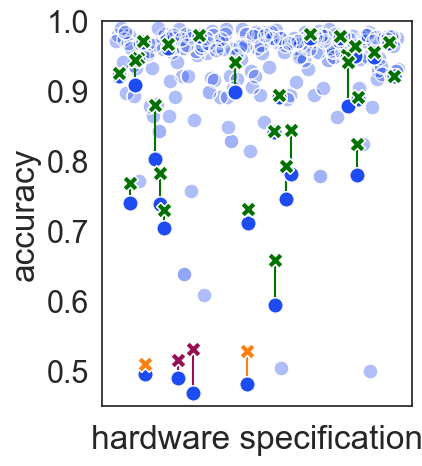

In [18]:
# sns.set(rc={'figure.figsize':(5,7)},style="white",font_scale=2)
if is_main:
    new_palette = [IPMA2_COLOR, TRAD_COLOR,  TRAD_COLOR, ORANGE, IPMA1_COLOR, TRAD_COLOR_W_ALPHA]
    hue_order = [1, 0, 2,6, 7, -1]
else:
    
    new_palette = [TRAD_COLOR, IPMA2_COLOR, TRAD_COLOR, IPMA3_COLOR, IPMA1_COLOR]
    hue_order = [0, 1, 2,6, 7]

# {4:0, 5:3, 6: 3}

current_df = df2[df2.horizon==5]
for h in hardware_order:
    h_df= current_df[current_df.hardware_spec == h ]
    if h_df.shape[0] == 1:
        z_order = 1
        g = sns.scatterplot(data=h_df, x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
    else:
        z_order = 4
        g = sns.scatterplot(data=h_df[h_df.program_type == "new"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
        z_order = 3
        g = sns.scatterplot(data=h_df[h_df.program_type == "trad"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
g.set(xticklabels=[])
g.set(xlabel="hardware specification")
# g.tick_params(bottom=True) 

for line in horizon_lines[5]:
    x = line[0]
    ymin = line[1]
    ymax = line[2]
    color = get_color(line[3], hue_order, new_palette)
    g.vlines([x], ymin, ymax, colors=color, zorder=2)
plt.ylim(0.45, 1.0)

if is_main:
    plt.savefig(DIR_PREFIX+"/images/horizon5_main.pdf", format='pdf')
else:
    plt.savefig(DIR_PREFIX+"/images/horizon5.pdf", format='pdf')


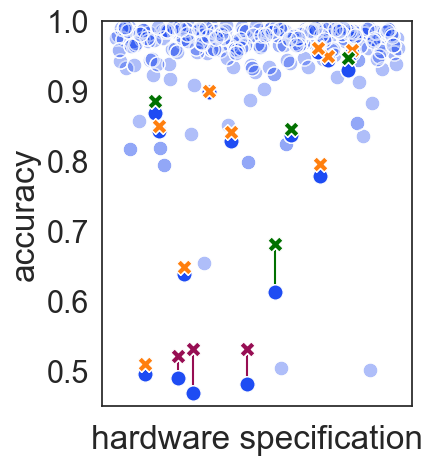

In [20]:
# # {4:0, 5:3, 6: 3}
if is_main:
    new_palette = [TRAD_COLOR, IPMA2_COLOR,  ORANGE, ORANGE, IPMA1_COLOR, TRAD_COLOR_W_ALPHA]
    hue_order = [0,3,2,5,6, -1]
else:
    new_palette = [TRAD_COLOR, IPMA2_COLOR,  IPMA4_COLOR, IPMA5_COLOR, IPMA1_COLOR]
    hue_order = [0,3,2,5,6]
sns.set_theme(style="white", font_scale=2)
current_df = df2[df2.horizon==6]
for h in hardware_order:
    h_df= current_df[current_df.hardware_spec == h ]
    if h_df.shape[0] == 1:
        z_order = 1
        g = sns.scatterplot(data=h_df, x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
    else:
        z_order = 4
        g = sns.scatterplot(data=h_df[h_df.program_type == "new"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
        z_order = 3
        g = sns.scatterplot(data=h_df[h_df.program_type == "trad"], x="hardware_spec", y="accuracy", hue="alg_class", 
                            style="program_type", legend=False, palette=new_palette,s=120, 
                            hue_order=hue_order, zorder=z_order, style_order=["trad", "new"])
g.set(xticklabels=[])
g.set(xlabel="hardware specification")
# g.tick_params(bottom=True) 

for line in horizon_lines[6]:
    x = line[0]
    ymin = line[1]
    ymax = line[2]
    color = get_color(line[3], hue_order, new_palette)
    g.vlines([x], ymin, ymax, colors=color, zorder=2)
    
plt.ylim(0.45, 1.0)
if is_main:
    plt.savefig(DIR_PREFIX+"/images/horizon6_I0_main.pdf", format='pdf')
else:
    plt.savefig(DIR_PREFIX+"/images/horizon6_I0.pdf", format='pdf')


In [19]:
# # {4:0, 5:3, 6: 3}
if is_main:
    new_palette = [TRAD_COLOR, IPMA2_COLOR, BROWN, ORANGE, BLUE_GREEN, IPMA1_COLOR, TRAD_COLOR_W_ALPHA]
    hue_order = [0,10,1,9,11,12, -1]
else:
    new_palette = [TRAD_COLOR, IPMA2_COLOR,  IPMA6_COLOR, IPMA1_COLOR, IPMA7_COLOR, IPMA8_COLOR,TRAD_COLOR]
    hue_order = [0,10,1,9,11,12,2]
# sns.set_theme(style="white")
# sns.set(rc={'figure.figsize':(15,10)},style="white",font_scale=1.5)
g = sns.scatterplot(data=df2[df2.horizon == 7], legend=False, x="hardware_spec", y="accuracy", style="program_type", hue="alg_class", palette=new_palette, hue_order=hue_order, s=120)
g.set(xticklabels=[])
g.set(xlabel="hardware specification")
# g.tick_params(bottom=True)

plt.ylim(0.45, 1.0)
for line in horizon_lines[7]:
    x = line[0]
    ymin = line[1]
    ymax = line[2]
    color = get_color(line[3], hue_order, new_palette)
    g.vlines([x], ymin, ymax, colors=color)
# sns.set(rc={'figure.figsize':(12,10)})
plt.savefig(DIR_PREFIX+"/images/horizon7.pdf", format='pdf')

NameError: name 'BLUE_GREEN' is not defined

Note: For Main Paper figures build images call with `filter_out_non_advantage=True`

In [41]:
for horizon in range(4, 8):
    print("horizon: ", horizon)
    print(round(get_highest_advantage(horizon_lines[horizon])*100, 3))
    print()

horizon:  4
0.050000000000000044
('fake_manhattan0', 0.479, 0.529, 1)
5.0

horizon:  5
0.07299999999999995
('fake_johannesburg0', 0.81, 0.883, 1)
7.3

horizon:  6
0.06600000000000006
('fake_cambridge2', 0.612, 0.678, 3)
('fake_manhattan1', 0.482, 0.548, 6)
6.6

horizon:  7
0.06600000000000006
('fake_cambridge2', 0.612, 0.678, 10)
6.6



In [47]:
def get_average_advantage(lines):
    s = 0
    
    for line in lines:
        s += line[2] - line[1]
        
    return round(s/len(lines)*100, 3)

In [48]:
for horizon in range(4, 8):
    print(horizon, ":", get_average_advantage(horizon_lines[horizon]))

4 : 3.4
5 : 2.964
6 : 2.692
7 : 3.326


In [46]:
for horizon in range(4,8):
    print(len(horizon_lines[horizon]))

4
22
13
19


In [49]:
horizon_lines[6]

[('fake_yorktown5', 0.773, 0.8, 2),
 ('fake_melbourne3', 0.836, 0.855, 3),
 ('fake_poughkeepsie4', 0.837, 0.846, 2),
 ('fake_johannesburg0', 0.869, 0.886, 3),
 ('fake_johannesburg1', 0.946, 0.952, 2),
 ('fake_paris4', 0.932, 0.948, 3),
 ('fake_cambridge0', 0.491, 0.508, 5),
 ('fake_cambridge2', 0.612, 0.678, 3),
 ('fake_rochester4', 0.627, 0.643, 2),
 ('fake_manhattan0', 0.486, 0.541, 6),
 ('fake_manhattan1', 0.482, 0.548, 6),
 ('fake_manhattan5', 0.497, 0.512, 2),
 ('fake_washington4', 0.499, 0.52, 6)]

In [52]:
for line in horizon_lines[7]:
    current_advantage = line[2] - line[1]
    print(line[3],current_advantage)

1 0.06400000000000006
1 0.051000000000000045
1 0.03300000000000003
1 0.04600000000000004
1 0.018000000000000016
1 0.02100000000000002
1 0.0050000000000000044
1 0.049000000000000044
1 0.03199999999999992
1 0.025000000000000022
9 0.02100000000000002
10 0.06600000000000006
1 0.031000000000000028
1 0.015000000000000013
11 0.015000000000000013
9 0.04700000000000004
12 0.04800000000000004
12 0.02100000000000002
1 0.02400000000000002


# Finding better examples for main paper

In [13]:
def get_trad_alg_indices(horizon):
    result = set()
    for (key, val) in algs_union[horizon].items():
        if val == 0:
            result.add(key)
    return result
            

In [23]:
# find hardware specifications whose best is the traditional algorithm in all horizons
trad_specs = set()

# add all hardware specs whose best is traditional algorithm at horizon 4
trad_specs = set(comments[4][0].split(","))
len(trad_specs)
for horizon in range(4,7):

    trad_algs_indices = get_trad_alg_indices(horizon)
    temp_trad_specs = set()
    for alg in trad_algs_indices:
        temp_trad_specs = temp_trad_specs.union(set(comments[horizon][alg].split(",")))
    trad_specs = trad_specs.intersection(temp_trad_specs)
        
len(trad_specs)

160

In [86]:
df = pd.read_csv(DIR_PREFIX + "analysis_results/all_lambdas.csv")
df['hardware'] = df['hardware_spec'] +"-" +df['embedding'].astype(str)
df['model'] = df['hardware_spec'].str.replace('fake_','')
df = df[df['hardware'].isin(list(res.hardware_spec))]

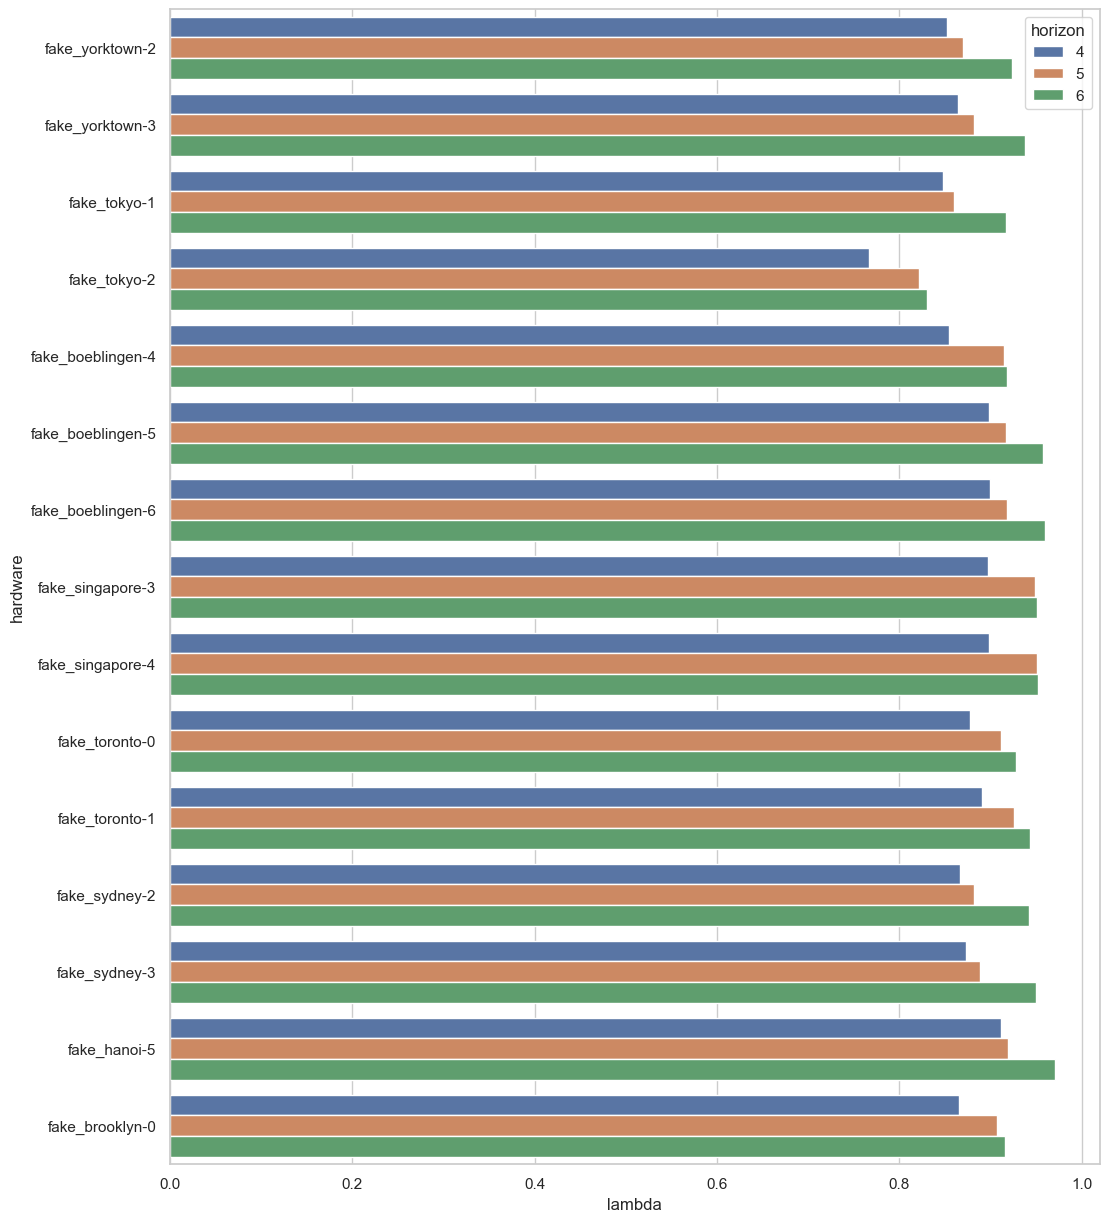

In [91]:
sns.set(rc={'figure.figsize':(12,15)})
sns.set_theme(style="whitegrid", font_scale=1)
ax = sns.barplot(data=df[df.horizon < 7], y="hardware", x="lambda", hue="horizon")

# ax.bar_label(ax.containers[0], fontsize=10)
# ax.bar_label(ax.containers[1], fontsize=10)
# ax.bar_label(ax.containers[2], fontsize=10)
# ax.bar_label(ax.containers[3], fontsize=10)
# plt.legend(loc='lower right')

# ax.set_titles("")
# ax.set_axis_labels("horizon", "accuracy")
plt.savefig(DIR_PREFIX+"/images/all_good_trad.pdf", format='pdf')

In [74]:
def get_highest_difference_dataframe(keep_backends):
    f = open(DIR_PREFIX + "analysis_results/all_lambdas.csv")
    guarantees = dict() # map hardware spec -> horizon -> acc
    lines = f.readlines()[1:]
    for line in lines:
        elements = line.split(",")
        backend = elements[1] + "-" + str(elements[2]) 
        if backend in keep_backends:
            horizon = int(elements[3])
            guarantee = float(elements[4])

            if backend not in guarantees.keys():
                guarantees[backend] = dict()
            guarantees[backend][horizon] = guarantee
        
    backends = []
    diffs = []
    
    for (backend, results) in guarantees.items():
        backends.append(backend)
        diffs.append(results[6] - results[4])
    return pd.DataFrame.from_dict({
        'hardware_spec': backends,
        'diff4_6': diffs
    })

In [76]:
diffs46_df = get_highest_difference_dataframe(trad_specs2)

In [81]:
res = diffs46_df[diffs46_df.diff4_6 >=0.05].sort_values(by=['diff4_6'], ascending=False)
res

,hardware_spec,diff4_6
62,fake_sydney-3,0.076869
61,fake_sydney-2,0.075642
17,fake_yorktown-3,0.073128
16,fake_yorktown-2,0.070701
46,fake_tokyo-1,0.068730
48,fake_boeblingen-4,0.064081
47,fake_tokyo-2,0.063979
50,fake_boeblingen-6,0.059454
63,fake_hanoi-5,0.059193
49,fake_boeblingen-5,0.059192


# check backend_vs

In [20]:
lambdas = dict() # horizon->backend-> (lambda, sim_acc)
backend_to_own_algo = dict() # horizon -> backend -> algo_index
for i in range(4, 8):
    lambdas[i] = dict()
    backend_to_own_algo[i] = dict()

f = open(DIR_PREFIX + "analysis_results/test_lambdas.csv")

lines = f.readlines()[1:]

for line in lines:
    elements = line.split(",")
    backend = elements[0]
    temp = backend.split("-")
    horizon = int(elements[1])
    l = float(elements[2])
    sim_acc = float(elements[3])
    assert horizon in lambdas.keys()
    assert backend not in lambdas[horizon].keys()
    lambdas[horizon][f"{temp[0]}{temp[1]}"] = (l, sim_acc)
    assert abs(l-sim_acc) < 0.1
    backend_to_own_algo[horizon][f"{temp[0]}{temp[1]}"] = get_backend_algorithm(temp[0], horizon, temp[1], comments)
    
f.close()

f = open(DIR_PREFIX + "analysis_results/backends_vs.csv")
lines = f.readlines()[1:]

for line in lines:
    elements = line.split(",")
    horizon = int(elements[0])
    alg_index = int(elements[1])
    backend = elements[2]
    sim_acc = float(elements[3])
    if alg_index == backend_to_own_algo[horizon][backend]:
        l, sim_acc2 = lambdas[horizon][backend]
        if abs(sim_acc - l) >= 0.01 and abs(sim_acc - sim_acc2) >= 0.01:
            print(horizon, backend, alg_index, l, sim_acc2, sim_acc, round(sim_acc - l,3))
    

f.close()


4 fake_tenerife1 0 0.7533080731324889 0.756 0.742 -0.011
4 fake_melbourne3 0 0.7791658973139998 0.783 0.767 -0.012
4 fake_tokyo2 0 0.7661269634640065 0.766 0.783 0.017
4 fake_johannesburg3 0 0.9385097308748754 0.941 0.927 -0.012
4 fake_almaden4 0 0.7438960041312067 0.735 0.755 0.011
4 fake_toronto4 0 0.7133793095616963 0.71 0.73 0.017
4 fake_rochester0 0 0.7415558000593754 0.746 0.724 -0.018
5 fake_poughkeepsie2 0 0.8546215694525122 0.856 0.869 0.014
5 fake_poughkeepsie4 0 0.8324375360041666 0.837 0.822 -0.01
5 fake_auckland0 2 0.8571062917809806 0.858 0.871 0.014
5 fake_manhattan4 0 0.500714295497282 0.515 0.483 -0.018
5 fake_manhattan5 0 0.5007143403425447 0.497 0.511 0.01
6 fake_paris4 3 0.9465224163018916 0.948 0.936 -0.011
6 fake_cambridge0 5 0.5103177552773096 0.507 0.521 0.011
6 fake_cambridge3 0 0.9300053068881836 0.933 0.92 -0.01
7 fake_kolkata2 0 0.9333971181055266 0.933 0.922 -0.011
7 fake_manhattan5 11 0.5010156975317548 0.49 0.525 0.024


In [22]:
lambdas = dict() # horizon->backend-> (lambda, sim_acc)
backend_to_own_algo = dict() # horizon -> backend -> algo_index
for i in range(4, 8):
    lambdas[i] = dict()
    backend_to_own_algo[i] = dict()

f = open(DIR_PREFIX + "analysis_results/test_lambdas.csv")

lines = f.readlines()[1:]

for line in lines:
    elements = line.split(",")
    backend = elements[0]
    temp = backend.split("-")
    horizon = int(elements[1])
    l = float(elements[2])
    sim_acc = float(elements[3])
    assert horizon in lambdas.keys()
    assert backend not in lambdas[horizon].keys()
    lambdas[horizon][f"{temp[0]}{temp[1]}"] = (l, sim_acc)
    assert abs(l-sim_acc) < 0.1
    backend_to_own_algo[horizon][f"{temp[0]}{temp[1]}"] = get_backend_algorithm(temp[0], horizon, temp[1], comments)
    
f.close()

f = open(DIR_PREFIX + "analysis_results/backends_vs_.csv")
lines = f.readlines()[1:]

for line in lines:
    elements = line.split(",")
    horizon = int(elements[0])
    alg_index = int(elements[1])
    backend = elements[2]
    sim_acc = float(elements[3])
    if alg_index == backend_to_own_algo[horizon][backend]:
        l, sim_acc2 = lambdas[horizon][backend]
        if abs(sim_acc - l) >= 0.01:
            print(horizon, backend, alg_index, l, sim_acc2, sim_acc, round(sim_acc - l,3))
    

f.close()


4 fake_tokyo2 0 0.7661269634640065 0.766 0.755 -0.011
4 fake_manhattan1 1 0.5299808647063564 0.529 0.51 -0.02
5 fake_melbourne3 3 0.844155601808699 0.835 0.855 0.011
5 fake_tokyo2 0 0.8220136554435529 0.824 0.833 0.011
5 fake_poughkeepsie5 0 0.8402555151454438 0.835 0.851 0.011
5 fake_almaden5 3 0.7928790831505428 0.799 0.781 -0.012
5 fake_mumbai5 3 0.8942969591407606 0.89 0.905 0.011
5 fake_cambridge0 6 0.5097462096943993 0.519 0.493 -0.017
5 fake_rochester1 3 0.7692706456115302 0.771 0.781 0.012
5 fake_manhattan0 6 0.5284778758883534 0.538 0.54 0.012
6 fake_toronto4 0 0.7962682093956078 0.798 0.786 -0.01
6 fake_manhattan1 7 0.5321746900445063 0.522 0.548 0.016
6 fake_manhattan5 2 0.5009016546407954 0.497 0.512 0.011
7 fake_rochester1 5 0.858304829159687 0.857 0.874 0.016
7 fake_manhattan4 11 0.5010156048736764 0.503 0.513 0.012


In [ ]:
alg